<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [ ]:
##### Begin Working Here #####

import pandas as pd



In [ ]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-07-14 00:08:19--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 34.213.98.158, 52.42.46.127, 54.149.64.5
Connecting to resources.lendingclub.com (resources.lendingclub.com)|34.213.98.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [           <=>      ]  22.21M  1.95MB/s    in 11s     

2020-07-14 00:08:31 (1.94 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23289953]



In [ ]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [ ]:
LoanStats = pd.read_csv('LoanStats_2018Q4.csv', skipfooter=2, skiprows=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
LoanStats.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,...,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,...,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,...,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7057.95,...,66.7,0,0,137276,87876,58600,74676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOME_CURTAILMENT,ACTIVE,4.0,0.0,May-2020,Jul-2020,May-2020,4.0,0.0,ACTIVE,1086.68,9481.75,55.80,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
LoanStats['term'].head()
#data type is object

0     36 months
1     60 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

In [ ]:
#Script for removing months and converting to integer
def killmonth(content):
  return int(content.strip('months'))

#applying funtion to all cells within LoanStats['term']

LoanStats['term'] = LoanStats['term'].apply(killmonth)

print(LoanStats['term'])

0         36
1         60
2         60
3         36
4         36
          ..
128407    36
128408    36
128409    36
128410    36
128411    36
Name: term, Length: 128412, dtype: int64


In [ ]:
#checking datatype
type(LoanStats['term'][3])

numpy.int64

In [ ]:
#Make a column named loan_status_is_great. It should contain the integer 1 
#if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.


#Checking for nan values and names of values
LoanStats['loan_status'].value_counts(dropna=False)

Current               84446
Fully Paid            31748
Charged Off            9759
Late (31-120 days)     1277
In Grace Period         889
Late (16-30 days)       277
Default                  16
Name: loan_status, dtype: int64

In [ ]:
#this works is the first way I did it to figure out my logic

toreplace = ['Charged Off', 'Late (31-120 days)',
            'In Grace Period','Late (16-30 days)','Default','Current','Fully Paid']
x = int(0)
y = int(1)
toreplace2 = [x,x,x,x,x,y,y]

LoanStats['loan_status_is_great'] = LoanStats['loan_status'].replace(toreplace, toreplace2)

In [ ]:
#this asks if status is current, fully paid, or anything else. 
def goodbad(status):
  if status in ['Current', 'Fully Paid'] :  
    return int(1)
  else:
    return int(0)

newlist = []

In [ ]:
#This loops the function across every cell in the set

for number in LoanStats['loan_status']:
  newlist.append(goodbad(number))



In [ ]:
#setting new list created by script as a column
LoanStats['loan_status_is_great'] = newlist

In [ ]:
#checking for correct values
LoanStats['loan_status_is_great'].value_counts(dropna=False)

1    116194
0     12218
Name: loan_status_is_great, dtype: int64

In [ ]:
#Checking that values are correct
LoanStats[['loan_status_is_great','loan_status']].head(10)

,loan_status_is_great,loan_status
0,0,Charged Off
1,1,Current
2,1,Current
3,1,Fully Paid
4,1,Current
5,1,Current
6,1,Current
7,0,Charged Off
8,0,Charged Off
9,1,Current


In [ ]:
#converting 'last_pymnt_d' to date time
import datetime as dt


LoanStats['last_pymnt_d']

0         Oct-2019
1         Jun-2020
2         May-2020
3         Oct-2019
4         Jun-2020
            ...   
128407    Dec-2018
128408    Jun-2020
128409    Jun-2020
128410    Jun-2020
128411    Jun-2020
Name: last_pymnt_d, Length: 128412, dtype: object

In [ ]:
#checking for null values
LoanStats['last_pymnt_d'].isnull().sum()

0

In [ ]:
#drop nulls
LoanStats['last_pymnt_d'] = LoanStats['last_pymnt_d'].fillna(0)

In [ ]:

LoanStats['last_pymnt_d'].value_counts()

Jun-2020    84169
Jul-2019     3146
Sep-2019     2755
Oct-2019     2722
Aug-2019     2716
Dec-2019     2713
May-2020     2621
May-2019     2547
Nov-2019     2388
Apr-2019     2356
Mar-2020     2319
Jan-2020     2304
Jun-2019     2288
Mar-2019     1984
Apr-2020     1983
Jul-2020     1944
Feb-2019     1915
Feb-2020     1789
Jan-2019     1561
Dec-2018     1054
Nov-2018      679
Oct-2018      234
0             159
Aug-2020       64
Sep-2020        2
Name: last_pymnt_d, dtype: int64

In [ ]:
#convert str to datetime64
LoanStats['last_pymnt_in_dt'] = pd.to_datetime(LoanStats['last_pymnt_d'], infer_datetime_format=True)
LoanStats['last_pymnt_in_dt'].dtype

dtype('<M8[ns]')

In [ ]:
#append to dataset and break down into year or month
LoanStats['last_pymnt_d_month'] = LoanStats['last_pymnt_in_dt'].dt.month
LoanStats['last_pymnt_d_year'] = LoanStats['last_pymnt_in_dt'].dt.year

In [ ]:
#checking to make sure everything is correct
LoanStats[['last_pymnt_d_month','last_pymnt_d_year']]

,last_pymnt_d_month,last_pymnt_d_year
0,10,2019
1,6,2020
2,5,2020
3,10,2019
4,6,2020
...,...,...
128407,12,2018
128408,6,2020
128409,6,2020
128410,6,2020


In [ ]:
LoanStats[['last_pymnt_d_month','last_pymnt_d_year','last_pymnt_in_dt',]]

,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_in_dt
0,10,2019,2019-10-01
1,6,2020,2020-06-01
2,5,2020,2020-05-01
3,10,2019,2019-10-01
4,6,2020,2020-06-01
...,...,...,...
128407,12,2018,2018-12-01
128408,6,2020,2020-06-01
128409,6,2020,2020-06-01
128410,6,2020,2020-06-01


In [ ]:
type(LoanStats['last_pymnt_d_year'][2])

numpy.int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [ ]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# %cd instacart_2017_05_01

In [ ]:
#Lending club
import numpy as np
import pandas as pd

loans = pd.read_csv('/content/LoanStats_2018Q4.csv', skipfooter=2, skiprows=1)

loans['emp_title']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


0                        Sever
1         Supply Chain Analyst
2                      Teacher
3               Administrative
4          Sale Representative
                  ...         
128407          Tax Consultant
128408          security guard
128409            Payoff Clerk
128410                     NaN
128411    Key Accounts Manager
Name: emp_title, Length: 128412, dtype: object

In [ ]:
#dropping null values and replacing with zero to be repalces by other later
loans['emp_title'] = loans['emp_title'].fillna(0)

In [ ]:
#checking for remaining null values
loans['emp_title'].isnull().sum()

0

In [ ]:
#list of top 20 job gathered from dataset

t20 = ['Teacher', 'Manager', 'Registered Nurse', 'Driver', 'RN', 'Supervisor',
       'Sales', 'Project Manager', 'General Manager', 'Office Manager',
       'Owner', 'Director', 'Operations Manager', 'Truck Driver', 'Nurse',
       'Engineer', 'Sales Manager', 'manager', 'Supervisor ',
       'Administrative Assistant']
newlist = []



In [ ]:
#replaces everything but the top 20 with other and fixes multiple listings of nurses
def titlechanger(title):
  if title in ['Teacher', 'Manager','Driver', 'Supervisor',
       'Sales', 'Project Manager', 'General Manager', 'Office Manager',
       'Owner', 'Director', 'Operations Manager', 'Truck Driver',
       'Engineer', 'Sales Manager', 'manager', 'Supervisor ',
       'Administrative Assistant']:  
    return title
  elif title in ['Registered Nurse','RN', 'Supervisor','Nurse']:  
      return 'Nurse'
  else:
      return 'other'


In [ ]:
#script to apply function
for title in loans['emp_title']:
  newlist.append(titlechanger(title))

In [ ]:
#creates new column from list
loans['df'] = newlist

In [ ]:
#checking to ensure script ran correctly
loans['df'].value_counts()

other                       115709
Teacher                       2090
Nurse                         2004
Manager                       1773
Driver                         924
Supervisor                     697
Sales                          580
Project Manager                526
General Manager                523
Office Manager                 521
Owner                          420
Director                       402
Operations Manager             387
Truck Driver                   387
Engineer                       325
Sales Manager                  304
manager                        301
Supervisor                     270
Administrative Assistant       269
Name: df, dtype: int64

In [ ]:
#filtering out "others" for visualization
professions = loans[loans['df']!='other']

In [ ]:
professions['df'].value_counts()

Teacher                     2090
Nurse                       2004
Manager                     1773
Driver                       924
Supervisor                   697
Sales                        580
Project Manager              526
General Manager              523
Office Manager               521
Owner                        420
Director                     402
Truck Driver                 387
Operations Manager           387
Engineer                     325
Sales Manager                304
manager                      301
Supervisor                   270
Administrative Assistant     269
Name: df, dtype: int64

In [ ]:
#crosstab of payments affected by covid by profession
covidskip_title = pd.crosstab(professions['df'], professions['hardship_type'],  normalize=False)

In [ ]:
#professions sorted by number of skips due to covid
covidskip_job_sorted = covidskip_title.sort_values(by = 'CVD19SKIP')

In [ ]:
covidskip_job_sorted

hardship_type,CVD19SKIP,DR02INTV01,INTEREST ONLY-3 MONTHS DEFERRAL,ST0650PV01
df,,,,
Operations Manager,20,4,0,1
Supervisor,20,0,0,0
Administrative Assistant,21,1,0,1
Engineer,22,4,0,0
Director,31,3,0,1
Truck Driver,34,1,1,0
Project Manager,36,4,0,0
manager,37,2,0,1
Sales Manager,44,2,0,1


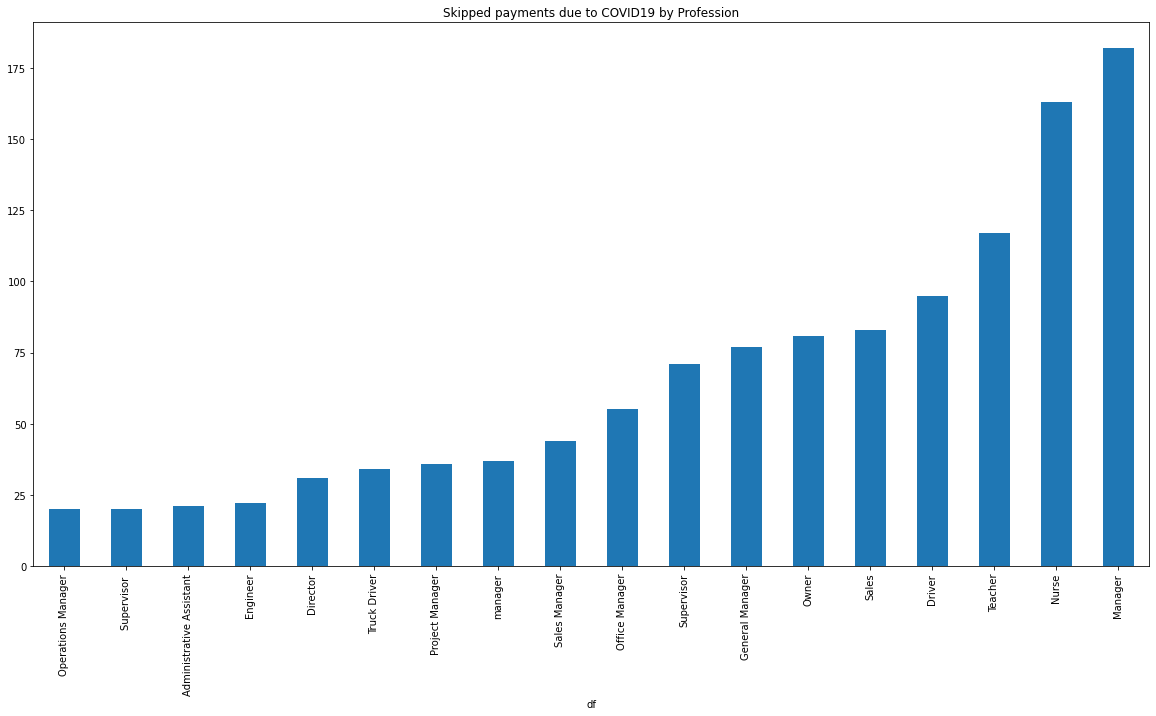

In [ ]:
#bar plot displaying which professions where unable to pay because of COVID19
covidskip_job_sorted['CVD19SKIP'].plot(kind = 'bar',figsize=(20,10), title=('Skipped payments due to COVID19 by Profession'), x=(('number of skipped')),
)